## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  20.273205  1188.113478  0.264216   4.316255  1.432791
1  52.086113   787.891725  0.674169   9.789131  1.388644
2  99.943916   548.115329  0.086598   2.747860  0.197305
3  79.905277  1755.825925  0.944848  10.790950  1.346758
4  26.374610   459.165076  0.566094   1.163968  1.462034


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.02934 | train_mse: 4.71893 | train_mae: 1.60882 |  0:00:00s
epoch 1  | loss: 0.63475 | train_mse: 4.00417 | train_mae: 1.44067 |  0:00:00s
epoch 2  | loss: 0.58784 | train_mse: 2.51338 | train_mae: 1.20296 |  0:00:00s


epoch 3  | loss: 0.42347 | train_mse: 3.84857 | train_mae: 1.32562 |  0:00:00s
epoch 4  | loss: 0.48109 | train_mse: 3.24055 | train_mae: 1.22799 |  0:00:00s


epoch 5  | loss: 0.40632 | train_mse: 2.82839 | train_mae: 1.13782 |  0:00:01s


epoch 6  | loss: 0.29904 | train_mse: 3.44774 | train_mae: 1.24278 |  0:00:01s


epoch 7  | loss: 0.3351  | train_mse: 2.38387 | train_mae: 1.02995 |  0:00:01s


epoch 8  | loss: 0.29381 | train_mse: 0.80035 | train_mae: 0.63729 |  0:00:01s


epoch 9  | loss: 0.24062 | train_mse: 0.83976 | train_mae: 0.68705 |  0:00:02s
epoch 10 | loss: 0.28084 | train_mse: 1.00674 | train_mae: 0.78968 |  0:00:02s


epoch 11 | loss: 0.29722 | train_mse: 0.96441 | train_mae: 0.77889 |  0:00:02s
epoch 12 | loss: 0.26521 | train_mse: 0.51962 | train_mae: 0.57711 |  0:00:02s


epoch 13 | loss: 0.17647 | train_mse: 0.4497  | train_mae: 0.5341  |  0:00:02s
epoch 14 | loss: 0.23858 | train_mse: 0.45932 | train_mae: 0.51474 |  0:00:02s


epoch 15 | loss: 0.24841 | train_mse: 0.40816 | train_mae: 0.48991 |  0:00:03s
epoch 16 | loss: 0.17801 | train_mse: 0.27426 | train_mae: 0.40452 |  0:00:03s


epoch 17 | loss: 0.14626 | train_mse: 0.32058 | train_mae: 0.42018 |  0:00:03s
epoch 18 | loss: 0.1645  | train_mse: 0.2883  | train_mae: 0.40551 |  0:00:03s
epoch 19 | loss: 0.30928 | train_mse: 0.16989 | train_mae: 0.33434 |  0:00:03s


epoch 20 | loss: 0.27455 | train_mse: 0.17185 | train_mae: 0.31762 |  0:00:03s
epoch 21 | loss: 0.20058 | train_mse: 0.21302 | train_mae: 0.35096 |  0:00:03s


epoch 22 | loss: 0.18981 | train_mse: 0.24275 | train_mae: 0.37168 |  0:00:03s
epoch 23 | loss: 0.25765 | train_mse: 0.22309 | train_mae: 0.35574 |  0:00:04s


epoch 24 | loss: 0.23833 | train_mse: 0.23145 | train_mae: 0.3673  |  0:00:04s


epoch 25 | loss: 0.22303 | train_mse: 0.20224 | train_mae: 0.35243 |  0:00:04s
epoch 26 | loss: 0.21186 | train_mse: 0.15489 | train_mae: 0.30919 |  0:00:04s


epoch 27 | loss: 0.29829 | train_mse: 0.18094 | train_mae: 0.31962 |  0:00:04s
epoch 28 | loss: 0.2356  | train_mse: 0.16755 | train_mae: 0.31259 |  0:00:04s


epoch 29 | loss: 0.16277 | train_mse: 0.18289 | train_mae: 0.32385 |  0:00:05s


epoch 30 | loss: 0.37111 | train_mse: 0.16119 | train_mae: 0.30947 |  0:00:05s
epoch 31 | loss: 0.14026 | train_mse: 0.15665 | train_mae: 0.30593 |  0:00:05s


epoch 32 | loss: 0.2082  | train_mse: 0.14781 | train_mae: 0.29692 |  0:00:05s
epoch 33 | loss: 0.168   | train_mse: 0.14052 | train_mae: 0.27519 |  0:00:05s


epoch 34 | loss: 0.12564 | train_mse: 0.13947 | train_mae: 0.27199 |  0:00:06s


epoch 35 | loss: 0.14097 | train_mse: 0.14398 | train_mae: 0.27871 |  0:00:06s


epoch 36 | loss: 0.1141  | train_mse: 0.15029 | train_mae: 0.30405 |  0:00:06s


epoch 37 | loss: 0.19527 | train_mse: 0.14094 | train_mae: 0.30994 |  0:00:07s


epoch 38 | loss: 0.11886 | train_mse: 0.11678 | train_mae: 0.27576 |  0:00:07s


epoch 39 | loss: 0.19068 | train_mse: 0.1189  | train_mae: 0.27251 |  0:00:08s
epoch 40 | loss: 0.1818  | train_mse: 0.13099 | train_mae: 0.27097 |  0:00:08s

epoch 41 | loss: 0.13956 | train_mse: 0.12047 | train_mae: 0.25423 |  0:00:08s


epoch 42 | loss: 0.136   | train_mse: 0.13699 | train_mae: 0.25516 |  0:00:09s


epoch 43 | loss: 0.14623 | train_mse: 0.16668 | train_mae: 0.27765 |  0:00:09s


epoch 44 | loss: 0.24347 | train_mse: 0.11837 | train_mae: 0.25652 |  0:00:09s


epoch 45 | loss: 0.11447 | train_mse: 0.10679 | train_mae: 0.24701 |  0:00:10s


epoch 46 | loss: 0.10115 | train_mse: 0.11188 | train_mae: 0.25317 |  0:00:10s


epoch 47 | loss: 0.18527 | train_mse: 0.09606 | train_mae: 0.23287 |  0:00:11s


epoch 48 | loss: 0.12622 | train_mse: 0.09257 | train_mae: 0.23233 |  0:00:11s
epoch 49 | loss: 0.17186 | train_mse: 0.09791 | train_mae: 0.24613 |  0:00:11s


epoch 50 | loss: 0.13826 | train_mse: 0.08945 | train_mae: 0.23179 |  0:00:12s


epoch 51 | loss: 0.25622 | train_mse: 0.09374 | train_mae: 0.2321  |  0:00:12s


epoch 52 | loss: 0.17356 | train_mse: 0.09975 | train_mae: 0.23905 |  0:00:13s


epoch 53 | loss: 0.14881 | train_mse: 0.09006 | train_mae: 0.21844 |  0:00:13s


epoch 54 | loss: 0.12142 | train_mse: 0.09843 | train_mae: 0.23535 |  0:00:13s


epoch 55 | loss: 0.14311 | train_mse: 0.11325 | train_mae: 0.25628 |  0:00:14s


epoch 56 | loss: 0.12058 | train_mse: 0.1159  | train_mae: 0.2543  |  0:00:14s


epoch 57 | loss: 0.18249 | train_mse: 0.09364 | train_mae: 0.2176  |  0:00:15s
epoch 58 | loss: 0.2025  | train_mse: 0.10383 | train_mae: 0.22674 |  0:00:15s


epoch 59 | loss: 0.1984  | train_mse: 0.12821 | train_mae: 0.25706 |  0:00:15s
epoch 60 | loss: 0.14864 | train_mse: 0.12304 | train_mae: 0.24718 |  0:00:15s


epoch 61 | loss: 0.10158 | train_mse: 0.1121  | train_mae: 0.23716 |  0:00:15s
epoch 62 | loss: 0.14624 | train_mse: 0.12006 | train_mae: 0.24717 |  0:00:15s


epoch 63 | loss: 0.25485 | train_mse: 0.13657 | train_mae: 0.26754 |  0:00:15s
epoch 64 | loss: 0.13913 | train_mse: 0.15809 | train_mae: 0.28495 |  0:00:16s
epoch 65 | loss: 0.16257 | train_mse: 0.17736 | train_mae: 0.30338 |  0:00:16s


epoch 66 | loss: 0.10322 | train_mse: 0.17186 | train_mae: 0.29829 |  0:00:16s
epoch 67 | loss: 0.15264 | train_mse: 0.14675 | train_mae: 0.26724 |  0:00:16s
epoch 68 | loss: 0.13085 | train_mse: 0.11992 | train_mae: 0.24226 |  0:00:16s


epoch 69 | loss: 0.14158 | train_mse: 0.11023 | train_mae: 0.2409  |  0:00:16s
epoch 70 | loss: 0.11796 | train_mse: 0.10239 | train_mae: 0.22823 |  0:00:16s
epoch 71 | loss: 0.09969 | train_mse: 0.10529 | train_mae: 0.23559 |  0:00:16s


epoch 72 | loss: 0.14825 | train_mse: 0.0886  | train_mae: 0.21283 |  0:00:16s
epoch 73 | loss: 0.10913 | train_mse: 0.08081 | train_mae: 0.2008  |  0:00:16s


epoch 74 | loss: 0.12389 | train_mse: 0.06514 | train_mae: 0.18261 |  0:00:17s
epoch 75 | loss: 0.126   | train_mse: 0.07226 | train_mae: 0.19054 |  0:00:17s
epoch 76 | loss: 0.13073 | train_mse: 0.11927 | train_mae: 0.25273 |  0:00:17s


epoch 77 | loss: 0.10384 | train_mse: 0.10349 | train_mae: 0.23717 |  0:00:17s
epoch 78 | loss: 0.11993 | train_mse: 0.07103 | train_mae: 0.21103 |  0:00:17s
epoch 79 | loss: 0.0948  | train_mse: 0.06757 | train_mae: 0.2027  |  0:00:17s


epoch 80 | loss: 0.14251 | train_mse: 0.06748 | train_mae: 0.19868 |  0:00:17s
epoch 81 | loss: 0.10485 | train_mse: 0.08466 | train_mae: 0.20969 |  0:00:17s
epoch 82 | loss: 0.11331 | train_mse: 0.0973  | train_mae: 0.22698 |  0:00:17s


epoch 83 | loss: 0.17675 | train_mse: 0.07246 | train_mae: 0.21641 |  0:00:17s
epoch 84 | loss: 0.09227 | train_mse: 0.0768  | train_mae: 0.22109 |  0:00:17s


epoch 85 | loss: 0.11372 | train_mse: 0.09094 | train_mae: 0.23522 |  0:00:18s
epoch 86 | loss: 0.09889 | train_mse: 0.09573 | train_mae: 0.23808 |  0:00:18s
epoch 87 | loss: 0.14646 | train_mse: 0.09218 | train_mae: 0.23738 |  0:00:18s


epoch 88 | loss: 0.16779 | train_mse: 0.06675 | train_mae: 0.20316 |  0:00:18s
epoch 89 | loss: 0.13771 | train_mse: 0.07164 | train_mae: 0.20266 |  0:00:18s
epoch 90 | loss: 0.09684 | train_mse: 0.0811  | train_mae: 0.21975 |  0:00:18s


epoch 91 | loss: 0.12258 | train_mse: 0.0872  | train_mae: 0.22565 |  0:00:18s
epoch 92 | loss: 0.12173 | train_mse: 0.08017 | train_mae: 0.22047 |  0:00:18s


epoch 93 | loss: 0.13354 | train_mse: 0.07796 | train_mae: 0.21581 |  0:00:18s
epoch 94 | loss: 0.16862 | train_mse: 0.07094 | train_mae: 0.21267 |  0:00:19s


epoch 95 | loss: 0.14169 | train_mse: 0.07682 | train_mae: 0.21707 |  0:00:19s
epoch 96 | loss: 0.12665 | train_mse: 0.07667 | train_mae: 0.21507 |  0:00:19s
epoch 97 | loss: 0.18778 | train_mse: 0.06505 | train_mae: 0.19706 |  0:00:19s


epoch 98 | loss: 0.11657 | train_mse: 0.05673 | train_mae: 0.18039 |  0:00:19s
epoch 99 | loss: 0.12218 | train_mse: 0.06433 | train_mae: 0.19568 |  0:00:19s
epoch 100| loss: 0.11806 | train_mse: 0.07757 | train_mae: 0.21825 |  0:00:19s


epoch 101| loss: 0.14013 | train_mse: 0.10469 | train_mae: 0.24854 |  0:00:19s
epoch 102| loss: 0.12056 | train_mse: 0.08868 | train_mae: 0.2097  |  0:00:19s


epoch 103| loss: 0.26191 | train_mse: 0.0753  | train_mae: 0.20759 |  0:00:19s
epoch 104| loss: 0.11991 | train_mse: 0.09002 | train_mae: 0.2276  |  0:00:20s


epoch 105| loss: 0.13702 | train_mse: 0.08225 | train_mae: 0.20986 |  0:00:20s
epoch 106| loss: 0.10018 | train_mse: 0.07786 | train_mae: 0.22045 |  0:00:20s


epoch 107| loss: 0.21062 | train_mse: 0.07588 | train_mae: 0.21386 |  0:00:20s


epoch 108| loss: 0.10808 | train_mse: 0.08042 | train_mae: 0.21299 |  0:00:21s


epoch 109| loss: 0.1081  | train_mse: 0.09912 | train_mae: 0.23315 |  0:00:21s


epoch 110| loss: 0.14208 | train_mse: 0.09858 | train_mae: 0.23236 |  0:00:22s
epoch 111| loss: 0.11998 | train_mse: 0.10435 | train_mae: 0.23692 |  0:00:22s


epoch 112| loss: 0.10931 | train_mse: 0.09488 | train_mae: 0.23132 |  0:00:22s
epoch 113| loss: 0.10646 | train_mse: 0.08339 | train_mae: 0.21886 |  0:00:22s
epoch 114| loss: 0.09885 | train_mse: 0.08398 | train_mae: 0.22112 |  0:00:22s


epoch 115| loss: 0.09479 | train_mse: 0.09599 | train_mae: 0.23225 |  0:00:22s
epoch 116| loss: 0.13496 | train_mse: 0.10729 | train_mae: 0.23867 |  0:00:22s
epoch 117| loss: 0.10557 | train_mse: 0.12458 | train_mae: 0.25561 |  0:00:22s


epoch 118| loss: 0.14862 | train_mse: 0.16941 | train_mae: 0.28713 |  0:00:22s


epoch 119| loss: 0.13619 | train_mse: 0.17654 | train_mae: 0.29334 |  0:00:23s
epoch 120| loss: 0.11903 | train_mse: 0.15491 | train_mae: 0.28415 |  0:00:23s


epoch 121| loss: 0.12058 | train_mse: 0.10893 | train_mae: 0.25652 |  0:00:23s
epoch 122| loss: 0.16699 | train_mse: 0.09543 | train_mae: 0.24692 |  0:00:23s


epoch 123| loss: 0.18644 | train_mse: 0.11092 | train_mae: 0.25864 |  0:00:23s


epoch 124| loss: 0.11029 | train_mse: 0.11864 | train_mae: 0.26421 |  0:00:24s
epoch 125| loss: 0.14676 | train_mse: 0.11224 | train_mae: 0.25203 |  0:00:24s
epoch 126| loss: 0.13707 | train_mse: 0.09769 | train_mae: 0.24389 |  0:00:24s


epoch 127| loss: 0.1537  | train_mse: 0.08015 | train_mae: 0.22579 |  0:00:24s
epoch 128| loss: 0.12816 | train_mse: 0.08146 | train_mae: 0.21793 |  0:00:24s
epoch 129| loss: 0.12175 | train_mse: 0.13965 | train_mae: 0.2769  |  0:00:24s


epoch 130| loss: 0.12057 | train_mse: 0.17328 | train_mae: 0.29115 |  0:00:24s


epoch 131| loss: 0.12172 | train_mse: 0.1641  | train_mae: 0.28367 |  0:00:24s
epoch 132| loss: 0.08884 | train_mse: 0.13069 | train_mae: 0.26501 |  0:00:25s
epoch 133| loss: 0.09225 | train_mse: 0.09596 | train_mae: 0.22848 |  0:00:25s


epoch 134| loss: 0.09689 | train_mse: 0.09918 | train_mae: 0.24166 |  0:00:25s
epoch 135| loss: 0.10916 | train_mse: 0.10793 | train_mae: 0.25717 |  0:00:25s
epoch 136| loss: 0.15487 | train_mse: 0.08277 | train_mae: 0.22174 |  0:00:25s


epoch 137| loss: 0.1921  | train_mse: 0.06397 | train_mae: 0.20416 |  0:00:25s
epoch 138| loss: 0.09654 | train_mse: 0.06999 | train_mae: 0.20937 |  0:00:25s
epoch 139| loss: 0.13048 | train_mse: 0.07003 | train_mae: 0.20434 |  0:00:25s


epoch 140| loss: 0.13417 | train_mse: 0.07124 | train_mae: 0.20367 |  0:00:25s
epoch 141| loss: 0.10883 | train_mse: 0.06948 | train_mae: 0.19719 |  0:00:25s


epoch 142| loss: 0.12799 | train_mse: 0.06753 | train_mae: 0.19637 |  0:00:26s
epoch 143| loss: 0.13325 | train_mse: 0.05833 | train_mae: 0.18614 |  0:00:26s


epoch 144| loss: 0.08072 | train_mse: 0.07585 | train_mae: 0.20682 |  0:00:26s
epoch 145| loss: 0.10807 | train_mse: 0.0968  | train_mae: 0.22939 |  0:00:26s
epoch 146| loss: 0.12837 | train_mse: 0.091   | train_mae: 0.22931 |  0:00:26s


epoch 147| loss: 0.10318 | train_mse: 0.09279 | train_mae: 0.22905 |  0:00:26s
epoch 148| loss: 0.10731 | train_mse: 0.08451 | train_mae: 0.21206 |  0:00:26s

Early stopping occurred at epoch 148 with best_epoch = 98 and best_train_mae = 0.18039
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

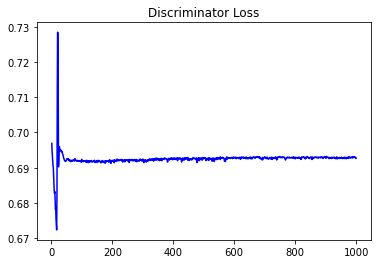

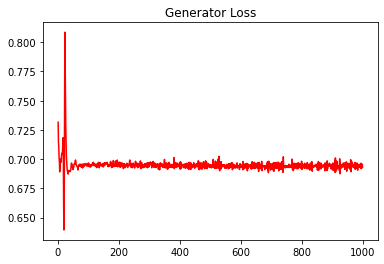

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6192741701160113


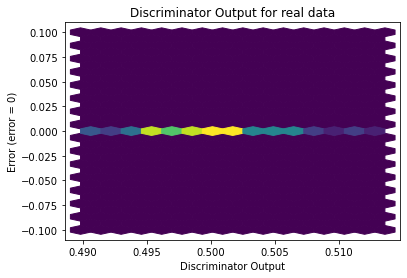

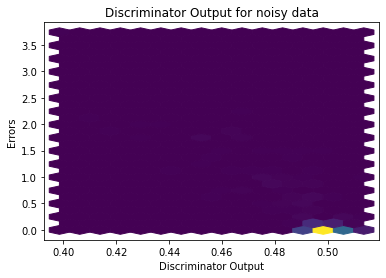

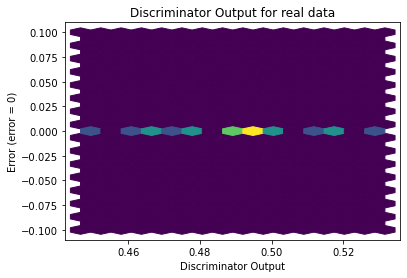

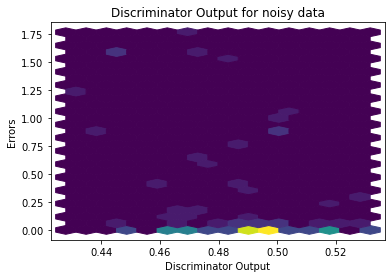

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


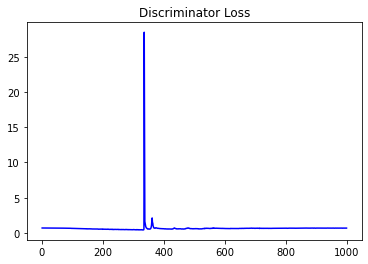

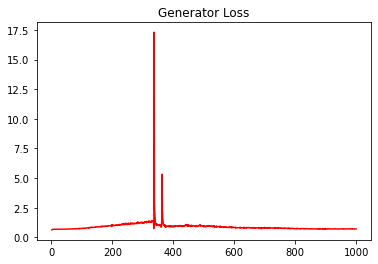

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4632265557904096


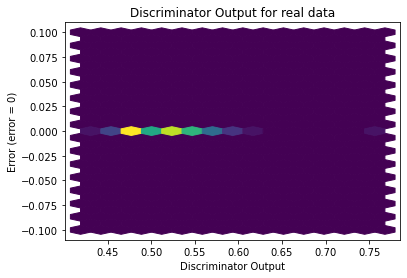

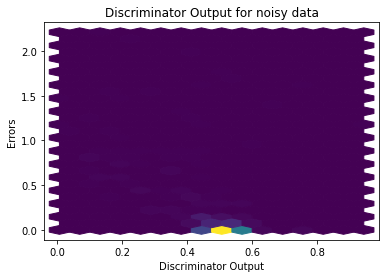

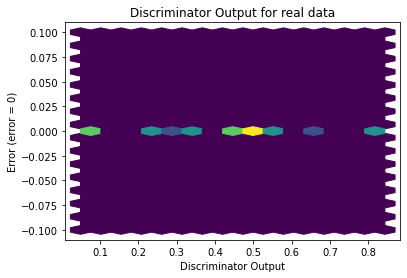

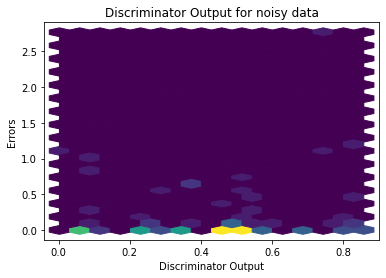

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0408]], requires_grad=True)
